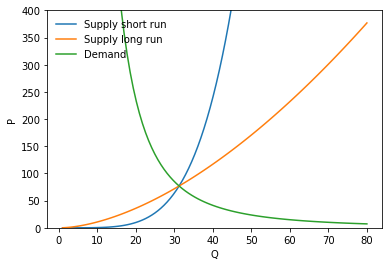

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np

df=pd.read_csv("https://uit-sok-1006-v22.github.io/seminarer/chickendata.csv",delimiter=";")


def demand_curve(c,Q,y,pb):
    #eq 14
    
    demand=(c.log(Q)-(-4.507+0.841*y
                       +0.277*pb))/(-0.397)
    
    return demand

def supply_curve_long_run(c,Q,N,X,pf,t):
    #eq 15
    supply=((1-0.631)*c.log(N*Q+X)
            -(2.030-0.146*pf
            + 0.0184*t))/0.221
    
    return supply


def supply_curve_short_run(c,Q,N,X,pf,t,qprod):
    #eq 16
    supply=(c.log(N*Q+X)
           -(2.030-0.146*pf
           +0.0184*t
           +0.631*c.log(N*qprod+X)))/0.221
    
    return supply


def equate_q(y,pb,N,X,pf,t):
    Q=sp.symbols("Q")
    eq=sp.Eq(demand_curve(sp,Q,y,pb),supply_curve_long_run(sp,Q,N,X,pf,t))
    sol=sp.nsolve(eq,40)
    return float(sol)


def plot_year(df,year):
    fig,ax=plt.subplots()
    ax.set_ylabel('P')
    ax.set_xlabel('Q')

    #obtaining the relevant variables for year:
    
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
   
    
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/d['CPI'])
    
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/d['CPI'])
    t=d['TIME']
    qprod=np.log(d['QPRODA']/1439)
    cpi=d['CPI']
    
    #finding equilibrium quantity:
    qprod=equate_q(y,pb,N,X,pf,t)  

    #plotting the function
    Q = np.linspace(1,80,100)

    ax.plot(Q,
            np.exp(
                supply_curve_short_run(np,Q,N,X,pf,t,qprod)
            )*cpi
            ,label='Supply short run')
    ax.plot(Q,
            np.exp(
                supply_curve_long_run(np,Q,N,X,pf,t)
            )*cpi
            ,label='Supply long run')
    ax.plot(Q,
            np.exp(
                demand_curve(np,Q,y,pb)
            )*cpi
            ,label='Demand')
    ax.set_ylim([0, 400])

    ax.legend(loc='upper left',frameon=False)


plot_year(df,1975) 
